# Logistic Regression

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:
df = pd.read_csv('hearing_test.csv') #../data&resources/

In [31]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


## Exploratory Data Analysis and Visualization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [34]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

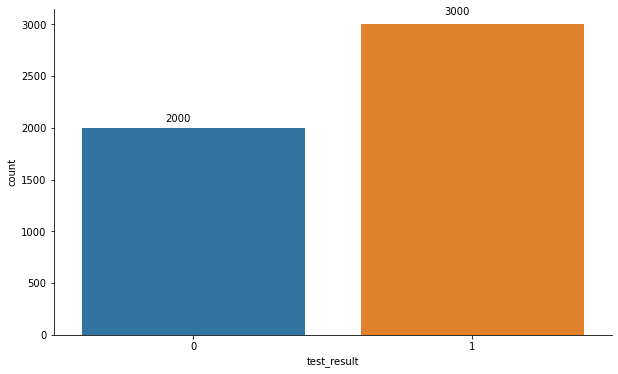

In [35]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

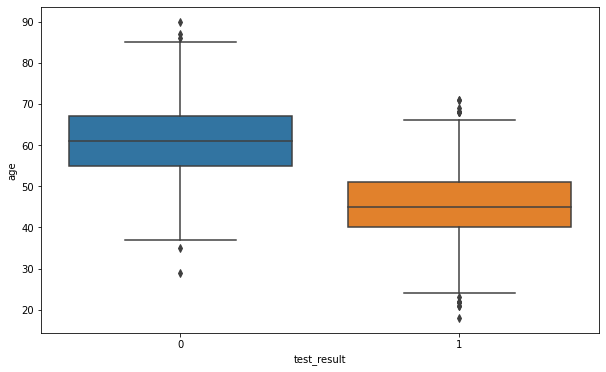

In [36]:
sns.boxplot(x='test_result',y='age',data=df);

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

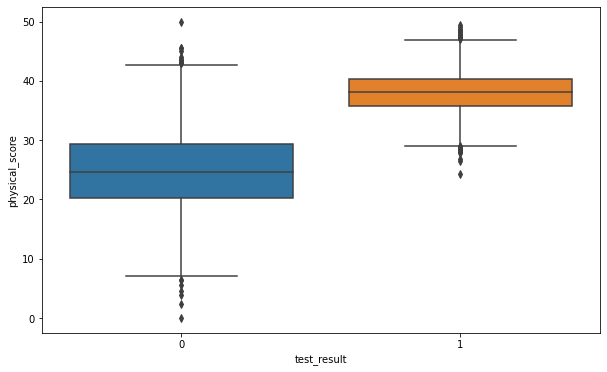

In [37]:
sns.boxplot(x='test_result',y='physical_score',data=df)

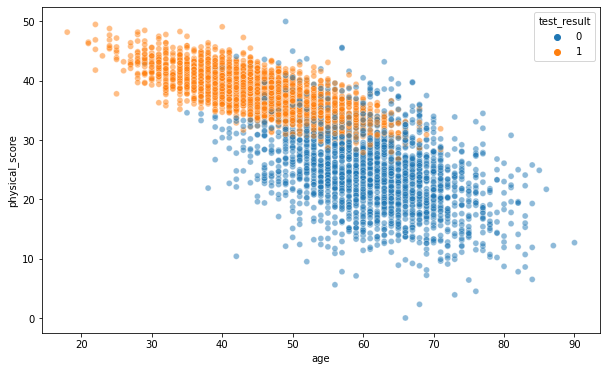

In [38]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

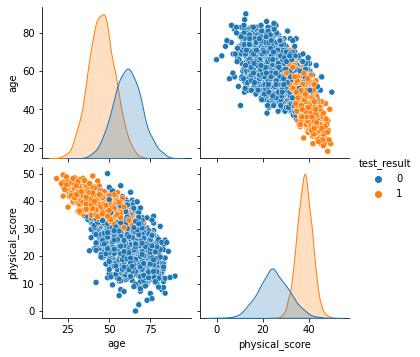

In [39]:
sns.pairplot(df,hue='test_result');

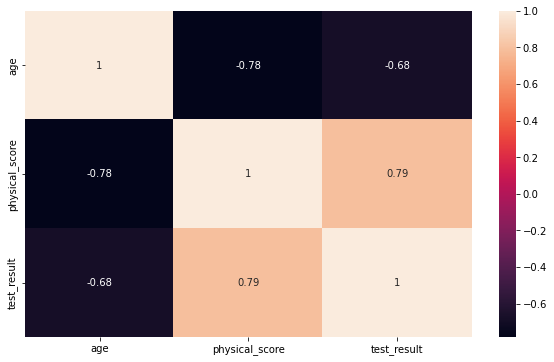

In [40]:
sns.heatmap(df.corr(), annot=True);

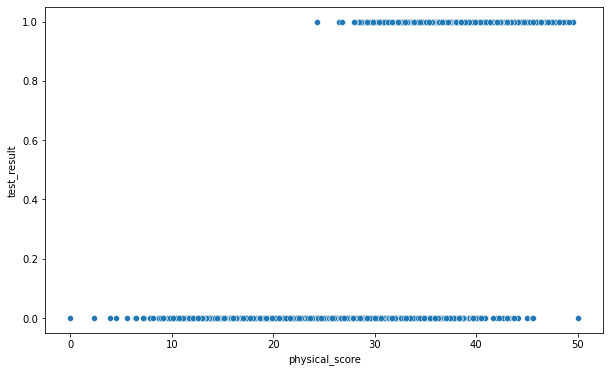

In [41]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

## Train | Test Split and Scaling

In [43]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [48]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [49]:
#help(LogisticRegression)

In [50]:
log_model = LogisticRegression()  # c alphaya benziyor

In [51]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [1]:
log_model.coef_  # lM deki gibi feature ı şu kadar etkiliyor diyemiyoruz
# pozitifler 1 clasına çalışıyor negatiflar 0 clasına çalışıyor. yani pozitif coefler targetın 1 olması yönüne doğru negatifler 0 olması yönüne doğru çekiyor

NameError: name 'log_model' is not defined

In [53]:
log_model.intercept_  # 0.5 in üstünde bir deger olursa testi geçer altındaysa kalır diyebiliriz.
# balance data için en iyi threshold zaten 0,5 tir
# hedef claster hangisiyse onu daima 1 yapmak lazım
# çünkü her zaman pred yaparken 1 yada degil vsvs diye seçi


# intercept degeri negatif olursa ki burada 0.5 altında, pozitif olursa da 0.5 in üzerinde oldugunu biliyoruz 
# 
# dertsen tekrar not al.

array([0.48867341])

Probability ne kadar 0.5'e yakinsa yanlis tahmin olasiligi o kadar yuksektir diyebilir miyiz hocam? 
deriz zaten bizim isteidigmiz şey pred proba degerlerinin yüksek olması

In [54]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [55]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [56]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [57]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [58]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [59]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [60]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
3138,47.000,39.800,1,0.980,1
2398,59.000,30.100,0,0.223,0
1266,48.000,42.000,1,0.991,1
153,71.000,16.700,0,0.000,0
2785,39.000,42.100,1,0.996,1
4756,41.000,38.900,1,0.982,1
4917,65.000,30.300,0,0.159,0
569,38.000,40.400,1,0.993,1
3451,58.000,21.400,0,0.008,0
856,47.000,38.200,1,0.961,1


## Model Performance on Classification Tasks

In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [62]:
accuracy_score(y_test,y_pred)

0.93

In [63]:
log_model.score(X_test_scaled, y_test)  #buda accuracy

0.93

In [64]:
precision_score(y_test, y_pred)  #hedef sutunumuz ne ise pos label parametresini ona atarız. yani kanserli 1 ise model 1 e göre scor verir.

0.9331210191082803

In [65]:
recall_score(y_test, y_pred)

0.9543973941368078

In [66]:
f1_score(y_test,y_pred, average = "weighted")

0.9297480869650194

presi, recall,  f1 pos ..= 1 parametresi 1 lerin üzerinden score üretir. 0 larınkini istersek bunu degiştiririz.

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [68]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

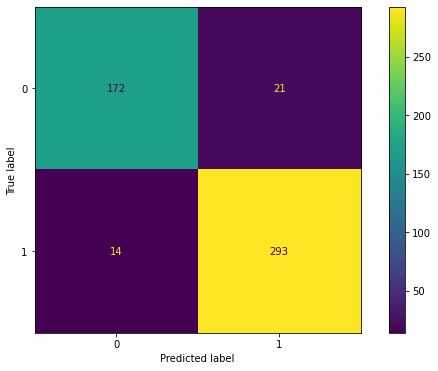

In [69]:
#manuel prediction yapmadan bu fonksiyonun çalıştığından bahset
plot_confusion_matrix(log_model, X_test_scaled, y_test);

C9117-Dustin Today at 10:16 PM
Yeterli veri yok mu demek bu durum
:alert-blue:
1

7 replies

Orion C.- Instructor  6 minutes ago
decion boundry ye yakın demek

Orion C.- Instructor  6 minutes ago
az data değil

Orion C.- Instructor  5 minutes ago
sınırda karşılıklı geçişler olmasını bekliyoruz

C9117-Dustin  5 minutes ago
Boundary’ye yakin probability dondurmesi, yani net olarak 0 veya 1 diyememesinin training ile bir ilgisi yok mu hocam?

Orion C.- Instructor  5 minutes ago
çok girdili çıktılı olursa bu boundry complex bir model olur o zmanda overfit ortaya çıkar

Orion C.- Instructor  3 minutes ago
model eğitiliyor ama sınırda iki classda birbirine grift oladuğundan(noise) hatalar çıkıyor uzak noktalarda hatalar genelde çok az çıkar

C9117-Dustin  3 minutes ago
Anladim hocam, sagolun.








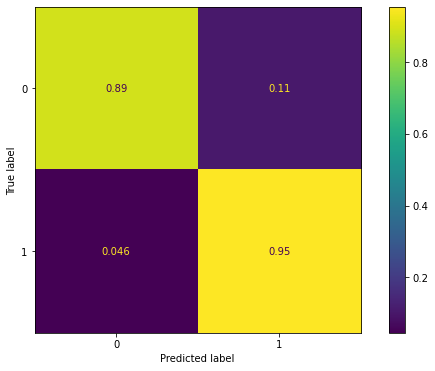

In [70]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

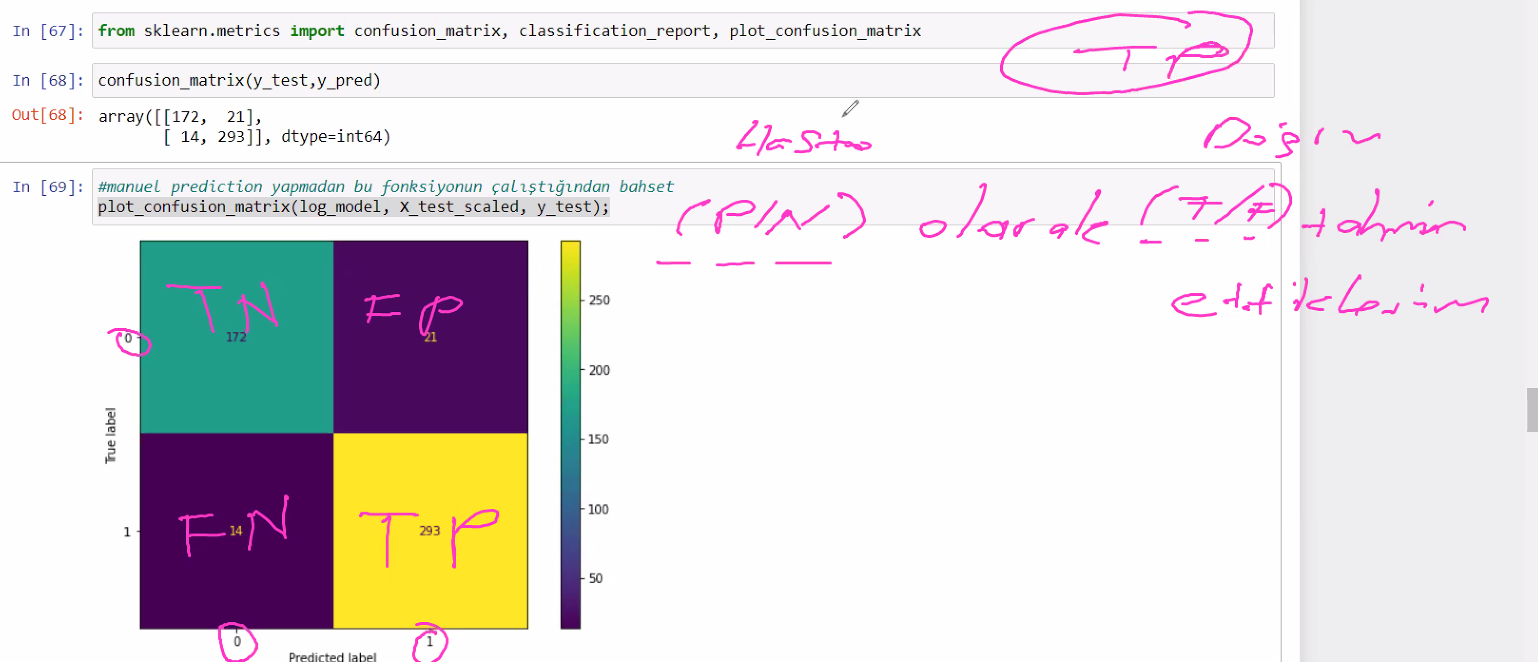
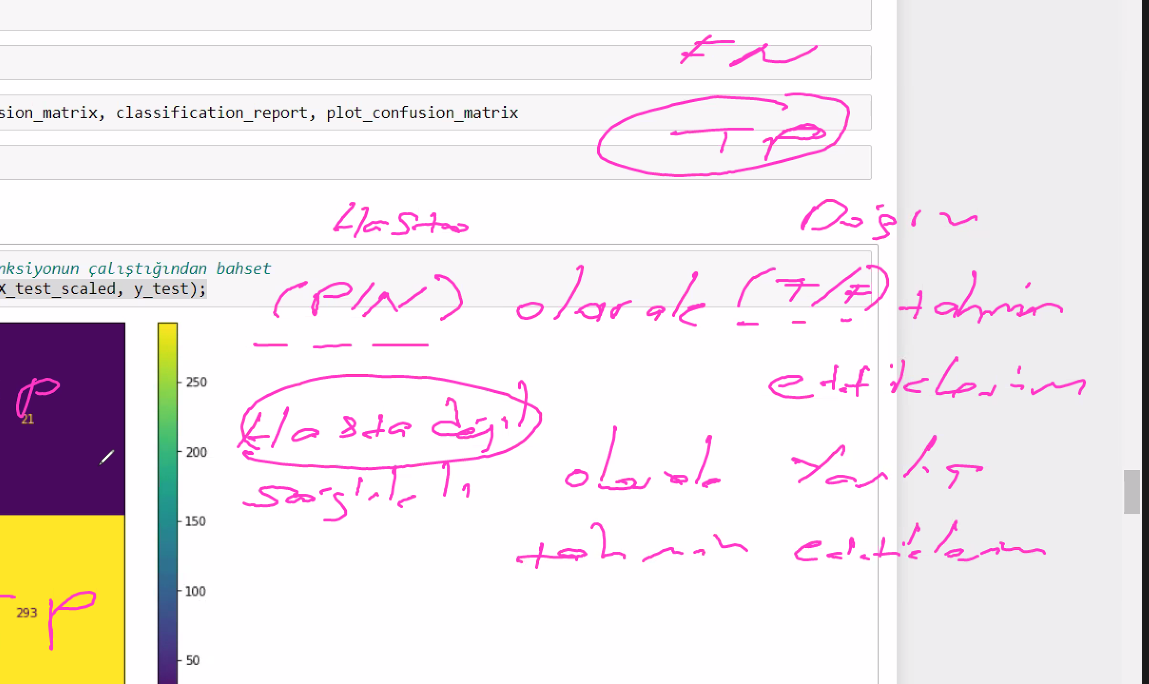

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



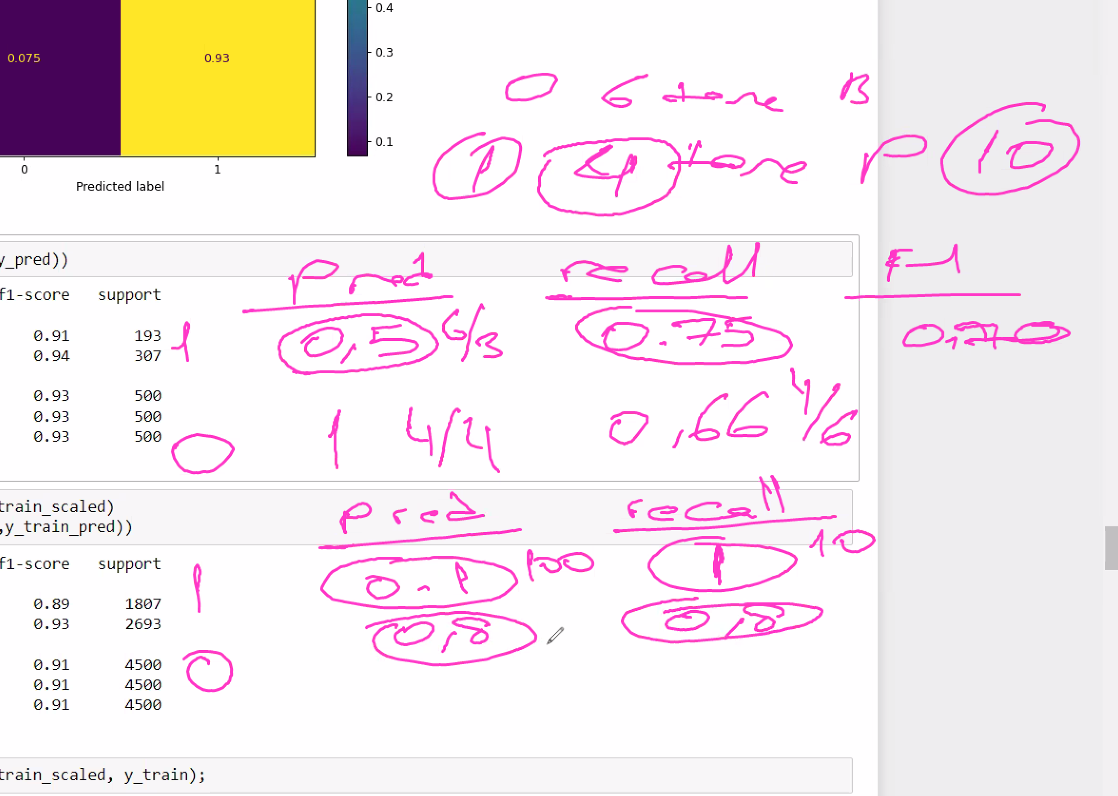
ne çok sallasın nede az tahmin yapsın.


precision recall ilişkisi : model yaptıgı tahminlerin çogunu tutturabilmesi önemli. yani en iyi tahmin scoruyla en çok hastayı tespit edebilsin.

- çok fazla bilip az tahmin scoru yada tahmin scoru çok yüksek olup düşük hasta tespiiti istemiyoruz. 1000 tane kişiye kanser diyip 2 tane bilmesi demek yüksek maliyet.,, yada 10 tane tahmin yaptı ama 100 kişinin 8 ini buldu diger hastaların tedavi yapılmamasına sebeb oldu.

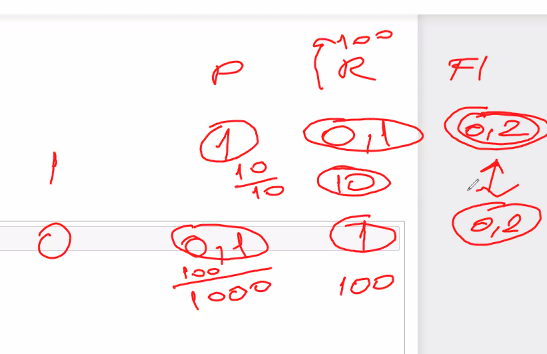

In [72]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred)) 

## makro inbalanced datalarda dikkate alırız.
# makto direkt 0 ve 1 in precision scorunu toplar ikiye boler.
# weighted de gözlem sayısı suppert ile (büyük score agırlık verir.)
# mikro diye bişey var oda accuracy scoruyla aynı scordur. büütn degerler birbinie yakınsa bunu kullanabiliriz.

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



- datam dengeliyse mikro scoru kullanabilirim.
 - data dengeli ve çogunluk olan sınıfın scorunu dikkate almak istiyorum dersek

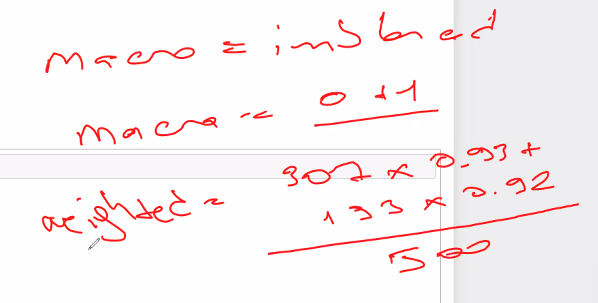

- 0 ların ve 1 lerin kendi içide yüksek scorelara sahip olması güçlü model demek. gerçek hayat projelerinde normalde biz kanserli hastaları tahmin ettigimiz için amaç 1 leri iyileştirmek. gerçek hayatta 1 ler az oldugu için 0 ve 1 lerin scorelarının arswı baya açık olacak. yani biraz imbalanced data demek. 

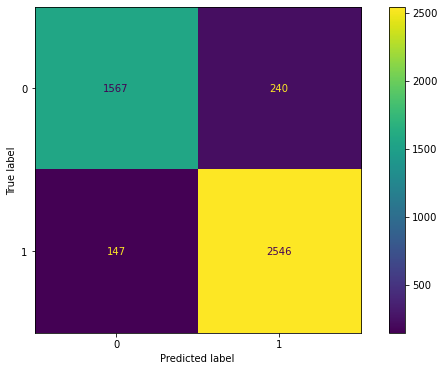

In [73]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validate

In [74]:
from sklearn.model_selection import cross_validate 
# biner? classification da daima 1 sınıfına göre scor döndürür

In [76]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [79]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.010,0.005,0.900,0.889,0.952,0.919
2,0.007,0.003,0.924,0.921,0.956,0.938
3,0.007,0.003,0.936,0.917,0.981,0.948
4,0.007,0.003,0.931,0.938,0.948,0.943
5,0.007,0.004,0.938,0.941,0.955,0.948
6,0.007,0.004,0.902,0.934,0.900,0.917
7,0.006,0.003,0.898,0.889,0.948,0.917
8,0.007,0.003,0.911,0.896,0.963,0.928
9,0.007,0.003,0.891,0.910,0.907,0.909
10,0.002,0.000,0.916,0.911,0.952,0.931


In [80]:
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [84]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier.
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

In [58]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

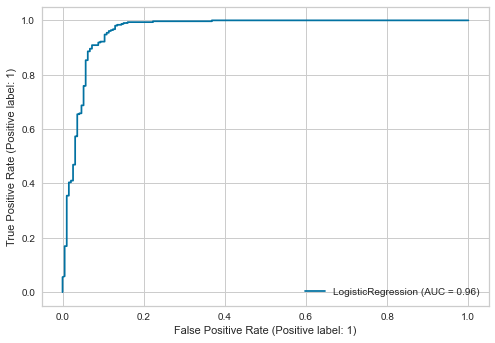

In [59]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [60]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

In [61]:
roc_auc_score(y_test, y_pred)  # bu yanlış 

0.9227945519906837

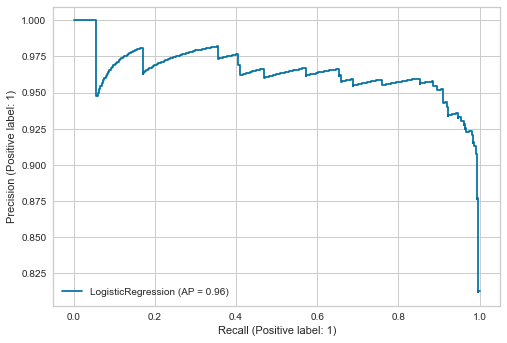

In [62]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

balance data
roc_auc_score(y_test, y_pred_proba[:,1]) (y_pred_proba)
imbalancedata
plot_precision_recall_curve(log_model, X_test_scaled, y_test); (y_test) kullanıyoruz önemli ayrıntı 

## Final Model and Model Deployment

In [75]:
scaler = StandardScaler().fit(X)  # scaler ı mizi sadece fit olarak kaydetmek lazım fit transform ile degil.

In [76]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [77]:
X_scaled = scaler.transform(X)

In [78]:
final_model = LogisticRegression().fit(X_scaled, y)

In [79]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [80]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [81]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [82]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [83]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [84]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [85]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [86]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000
